<a href="https://colab.research.google.com/github/Julia-Vanyarina/neiro/blob/main/Lab4_Using_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Повышение точности компьютерного зрения с помощью свертки

В предыдущих уроках вы видели, как выполнять распознавание моды с использованием глубокой нейронной сети (DNN), содержащей три слоя: входной слой (в форме данных), выходной слой (в форме желаемого результата) и скрытый слой. Вы экспериментировали с влиянием разного размера скрытого слоя, количества эпох обучения и т.д. На конечную точность.

Для удобства приведем еще раз весь код. Запустите его и обратите внимание на точность теста, которая распечатана в конце.

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

test_loss = model.evaluate(test_images, test_labels)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7788 - loss: 0.6315
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8629 - loss: 0.3844
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8763 - loss: 0.3363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8839 - loss: 0.3159
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8903 - loss: 0.2936
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8594 - loss: 0.3836


Ваша точность, вероятно, составляет около 89% при обучении и 87% при проверке ... неплохо ... Но как сделать это еще лучше? Один из способов - использовать нечто, называемое свертками. Я не буду здесь вдаваться в подробности о свертках, но конечная концепция заключается в том, что они сужают содержание изображения, фокусируясь на конкретных, отчетливых деталях.

Если вы когда-либо обрабатывали изображения с помощью фильтра (например, этого: https://en.wikipedia.org/wiki/Kernel_ (image_processing)), то свертки будут выглядеть очень знакомо.

... тогда требуется гораздо меньше информации...потому что вы будете просто тренироваться на выделенных функциях.

Это концепция сверточных нейронных сетей. Добавьте несколько слоев для выполнения свертки до того, как у вас появятся плотные слои, и тогда информация, поступающая в плотные слои, будет более сфокусированной и, возможно, более точной.

Запустите приведенный ниже код - это та же нейронная сеть, что и ранее, но на этот раз сначала добавлены сверточные слои. Это займет больше времени, но посмотрите на влияние на точность:

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)


2.18.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 46ms/step - accuracy: 0.7794 - loss: 0.6037
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 45ms/step - accuracy: 0.8885 - loss: 0.2994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.9078 - loss: 0.2488
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 47ms/step - accuracy: 0.9200 - loss: 0.2115
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 46ms/step - accuracy: 0.9310 - loss: 0.1833
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9050 - loss: 0.2792


Вероятно, он вырос примерно до 93% для обучающих данных и 91% для данных проверки.

Это важно и шаг в правильном направлении!

Попробуйте запустить его еще несколько эпох - скажем, около 20, и ознакомьтесь с результатами! Но хотя результаты могут показаться действительно хорошими, на самом деле результаты проверки могут ухудшиться из-за так называемого "переоснащения", которое будет обсуждаться позже.

(В двух словах, "переобучение" происходит, когда сеть действительно хорошо изучает данные из обучающего набора, но она слишком специализирована только на этих данных и, как следствие, менее эффективна при просмотре * других * данных. Например, если всю свою жизнь вы видели только красные туфли, то, увидев красную обувь, вы бы очень хорошо ее опознали, но синие замшевые туфли могут вас смутить ... и вы знаете, что вам никогда не следует связываться с моими синими замшевыми туфлями.)

Затем взгляните на код еще раз и посмотрите, шаг за шагом, как были построены свертки:

Шаг 1 - собрать данные. Вы заметите, что здесь есть небольшое изменение в том, что данные обучения необходимо изменить. Это потому, что первая свертка ожидает единый тензор, содержащий все, поэтому вместо 60 000 элементов 28x28x1 в списке у нас есть единый список 4D размером 60 000x28x28x1, и то же самое для тестовых изображений. Если вы этого не сделаете, вы получите сообщение об ошибке при обучении, поскольку свертки не распознают форму.



```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7685 - loss: 0.6417
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8871 - loss: 0.3096
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9072 - loss: 0.2548
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9176 - loss: 0.2211
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9283 - loss: 0.1949
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8988 - loss: 0.2926
0.9014999866485596


Далее необходимо определить вашу модель. Теперь вместо входного слоя вверху вы собираетесь добавить свертку. Параметры следующие::

1. Количество свертков, которые вы хотите сгенерировать. Чисто произвольный, но хорошо бы начать с чего-нибудь порядка 32
2. Размер свертки, в данном случае сетки 3x3
3. Используемая функция активации - в этом случае мы будем использовать relu, которая, как вы помните, эквивалентна возврату x, когда x> 0, в противном случае возвращается 0
4. На первом слое - форма входных данных.

... вы заметите, что после каждого слоя MaxPooling размер изображения уменьшается таким образом.


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Добавьте еще одну свертку



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Теперь сгладьте выходные данные. После этого у вас будет та же структура DNN, что и в несверточной версии

```
  tf.keras.layers.Flatten(),
```



Те же 128 плотных слоев и 10 выходных слоев, что и в примере предварительной свертки:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Теперь скомпилируйте модель, вызовите метод fit для выполнения обучения и оцените потери и точность по тестовому набору.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




# Визуализация сверток и объединение в пул

Этот код покажет нам свертки графически. Печать (test_labels[;100]) показывает нам первые 100 меток в тестовом наборе, и вы можете видеть, что все метки с индексом 0, индексом 23 и индексом 28 имеют одинаковое значение (9). Все они представляют собой ботинки. Давайте посмотрим на результат выполнения свертки для каждого из них, и вы начнете замечать, что между ними появляются общие черты. Теперь, когда DNN обучается на этих данных, он работает с гораздо меньшим объемом данных и, возможно, находит общность между shoes на основе этой комбинации свертки / объединения.

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1. Загрузка и подготовка данных MNIST
python
Copy
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
Загружаем стандартный датасет MNIST (рукописные цифры)

Изменяем форму тестовых изображений (10000 примеров, 28x28 пикселей, 1 канал - ч/б)

Нормализуем значения пикселей в диапазон [0,1]

2. Создание модели с помощью Functional API
python
Copy
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_layer)
...
model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
Явно определяем входной слой с формой (28,28,1)

Последовательно добавляем слои свертки, пулинга и полносвязные слои

Создаем модель, явно указывая входы и выходы

3. Создание модели для визуализации активаций
python
Copy
layer_outputs = [layer.output for layer in model.layers[1:]]  # Пропускаем входной слой
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
Собираем выходы всех слоев (кроме входного)

Создаем новую модель, которая будет возвращать активации всех слоев

4. Настройка визуализации
python
Copy
f, axarr = plt.subplots(3, 4, figsize=(12, 8))
Создаем сетку графиков 3 строки × 4 столбца

5. Визуализация активаций
python
Copy
for x in range(min(4, len(layer_outputs))):
    f1 = activation_model.predict(test_images[FIRST_IMAGE][np.newaxis, ...])[x]
    if len(f1.shape) == 4:
        axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
Для первых 4 слоев (или всех, если их меньше):

Получаем активации для трех разных изображений

Проверяем, что слой имеет 4D-выход (подходит для визуализации)

Отображаем активации определенного фильтра (CONVOLUTION_NUMBER)

Настраиваем отображение (убираем оси и сетку)

Особенности решения:
Functional API вместо Sequential - гарантирует правильное построение модели

Проверка размерностей - только 4D тензоры (сверточные слои) визуализируются

Обработка ошибок - пропускаем слои, которые нельзя отобразить

Гибкость - работает с любым количеством слоев

Этот подход надежен, потому что:

Модель строится явно с указанием входов/выходов

Все слои правильно инициализированы до создания activation_model

Код адаптируется под разные архитектуры сетей

Результат - визуализация того, как разные слои сети "видят" входные изображения.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


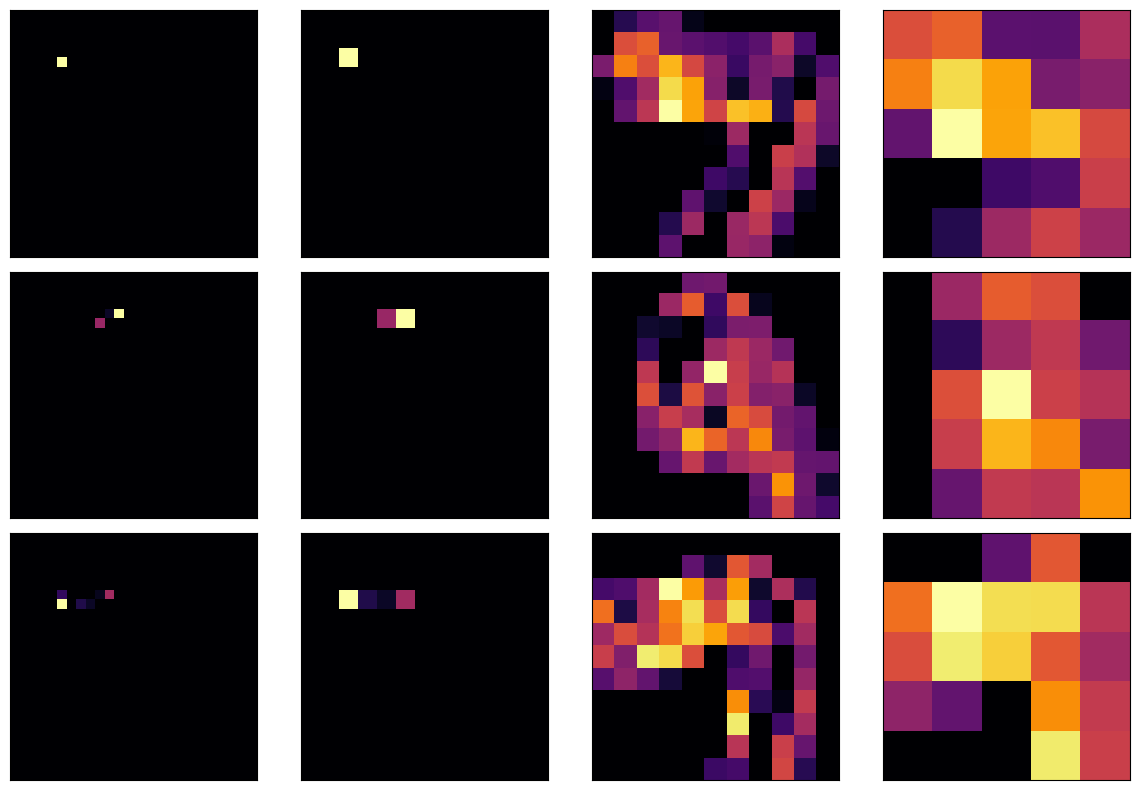

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 1. Load and prepare MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 2. Define and build the model properly
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output_layer = tf.keras.layers.Dense(10)(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

# 3. Alternative way to create activation model
layer_outputs = [layer.output for layer in model.layers[1:]]  # Skip input layer
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# 4. Visualization setup
f, axarr = plt.subplots(3, 4, figsize=(12, 8))
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 0  # Changed to 0 as first filter index

# 5. Get and display activations
for x in range(min(4, len(layer_outputs))):  # For first 4 layers or all if less
    try:
        # First image
        f1 = activation_model.predict(test_images[FIRST_IMAGE][np.newaxis, ...])[x]
        if len(f1.shape) == 4:  # Conv/Pool layer
            axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[0, x].grid(False)
        axarr[0, x].set_xticks([])
        axarr[0, x].set_yticks([])

        # Second image
        f2 = activation_model.predict(test_images[SECOND_IMAGE][np.newaxis, ...])[x]
        if len(f2.shape) == 4:
            axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[1, x].grid(False)
        axarr[1, x].set_xticks([])
        axarr[1, x].set_yticks([])

        # Third image
        f3 = activation_model.predict(test_images[THIRD_IMAGE][np.newaxis, ...])[x]
        if len(f3.shape) == 4:
            axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[2, x].grid(False)
        axarr[2, x].set_xticks([])
        axarr[2, x].set_yticks([])
    except:
        axarr[0, x].axis('off')
        axarr[1, x].axis('off')
        axarr[2, x].axis('off')

plt.tight_layout()
plt.show()

УПРАЖНЕНИЯ

1. Попробуйте отредактировать свертки. Измените 32 секунды на 16 или 64. Как это повлияет на точность и / или время тренировки.

2. Удалите последнюю свертку. Как это повлияет на точность или время обучения?

3. Как насчет добавления дополнительных сверток? Как вы думаете, какое влияние это окажет? Поэкспериментируйте с этим.

4. Удалите все свертки, кроме первой. Как вы думаете, какое влияние это окажет? Поэкспериментируйте с этим.

5. На предыдущем уроке вы реализовали обратный вызов для проверки функции потерь и отмены тренировки, как только она достигнет определенной суммы. Посмотрите, сможете ли вы реализовать это здесь!

In [ ]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.18.0
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9150 - loss: 0.2991
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9836 - loss: 0.0549
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9907 - loss: 0.0306
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9942 - loss: 0.0198
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9966 - loss: 0.0116
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9974 - loss: 0.0081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9978 - loss: 0.0063
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9982 - loss: 0.0055
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9991 - loss: 0.0031
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9991 - loss: 0.0031
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9846 - loss: 0.0625
0.988499999046325